# Hamiltonian Construction: Active-Space Scaling and Qubit Requirements

Quantum computing offers a principled pathway toward simulating chemically realistic molecular systems that are intractable for classical electronic-structure methods. In the context of carbon capture, this requires constructing accurate second-quantized electronic Hamiltonians for molecules that participate in carbon-binding and sequestration pathways.

This notebook focuses exclusively on **Hamiltonian construction and scaling behavior**, rather than on solving for molecular energies. Using PennyLane’s quantum chemistry module with an STO-3G basis, we examine how active-space choices affect:

- the required number of qubits,
- the number of Pauli terms in the qubit Hamiltonian, and
- the constant (identity) coefficient {C_0} that arises from frozen orbitals and bookkeeping terms.

We use ammonia {NH_3}, carbonic acid {H_2CO_3} , and bicarbonate {HCO_3^-}  as representative molecules relevant to carbon capture chemistry.


We begin by defining molecular geometries using approximate experimental bond lengths (in Ångströms). These geometries are used solely for Hamiltonian construction and are not optimized.


### Active-Space Construction Strategy

For each molecule, we construct multiple electronic Hamiltonians by varying the number of active electrons and active spatial orbitals. The purpose is **not** to approximate a single “true” Hamiltonian, but to examine how different modeling choices reshape the resulting qubit operator.

Each active-space choice defines a *different effective Hamiltonian*, with energy contributions redistributed between explicit operator terms and the constant identity offset.


## Required Dependencies
#This notebook assumes a Python environment with the following packages installed:

#- `pennylane`
#- `pennylane-qchem`
#- `rdkit`
#- `numpy`
#- `matplotlib`
#- `pyscf`

#The results were generated using PennyLane’s quantum chemistry module with an STO-3G basis set.  
#No package installation commands are included in this notebook.


In [4]:
from pennylane import qchem

symbols = ["N", "H", "H", "H"]
coordinates = np.array([
    [0.0, 0.0, 0.0],     # Nitrogen atom at the origin
    [0.0, 0.94, 0.31],   # Hydrogen atom 1
    [0.82, -0.47, 0.31], # Hydrogen atom 2
    [-0.82, -0.47, 0.31] # Hydrogen atom 3
])

In [5]:
molecule = qchem.Molecule(symbols, coordinates)
H, qubits = qchem.molecular_hamiltonian(molecule)
print("Number of qubits: {:}".format(qubits))
print("Qubit Hamiltonian")
print(H)

Number of qubits: 16
Qubit Hamiltonian
-27.19469339870261 * I([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]) + 9.507595216258345 * Z(0) + -0.1159780874216137 * (Y(0) @ Z(1) @ Y(2)) + -0.1159780874216137 * (X(0) @ Z(1) @ X(2)) + -0.0002680981566523484 * (Y(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Y(6)) + -0.0002680981566523484 * (X(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ X(6)) + -0.026399219578424362 * (Y(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Z(6) @ Z(7) @ Y(8)) + -0.026399219578424362 * (X(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Z(6) @ Z(7) @ X(8)) + -0.061993063414185784 * (Y(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Z(6) @ Z(7) @ Z(8) @ Z(9) @ Y(10)) + -0.061993063414185784 * (X(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Z(6) @ Z(7) @ Z(8) @ Z(9) @ X(10)) + 0.0005850594638243142 * (Y(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Z(6) @ Z(7) @ Z(8) @ Z(9) @ Z(10) @ Z(11) @ Z(12) @ Z(13) @ Y(14)) + 0.0005850594638243142 * (X(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Z(6) @ Z(7) @ Z(8) @ Z

In [ ]:
basis_set = "sto-3g"
charge = 0 #neutral atom
multiplicity = 1 # (energy level) =2S+1, where S - spin angular momentum
electrons = 10 #(active electrons)
orbitals = 8
core, active = qchem.active_space(electrons, orbitals, active_electrons=8, active_orbitals=5)
print("Number of qubits: {:}".format(qubits))
print("Qubit Hamiltonian")
print(H)

Number of qubits: 16
Qubit Hamiltonian
-27.19469339870261 * I([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]) + 9.507595216258345 * Z(0) + -0.1159780874216137 * (Y(0) @ Z(1) @ Y(2)) + -0.1159780874216137 * (X(0) @ Z(1) @ X(2)) + -0.0002680981566523484 * (Y(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Y(6)) + -0.0002680981566523484 * (X(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ X(6)) + -0.026399219578424362 * (Y(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Z(6) @ Z(7) @ Y(8)) + -0.026399219578424362 * (X(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Z(6) @ Z(7) @ X(8)) + -0.061993063414185784 * (Y(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Z(6) @ Z(7) @ Z(8) @ Z(9) @ Y(10)) + -0.061993063414185784 * (X(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Z(6) @ Z(7) @ Z(8) @ Z(9) @ X(10)) + 0.0005850594638243142 * (Y(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Z(6) @ Z(7) @ Z(8) @ Z(9) @ Z(10) @ Z(11) @ Z(12) @ Z(13) @ Y(14)) + 0.0005850594638243142 * (X(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Z(6) @ Z(7) @ Z(8) @ Z

Reduced active space

In [7]:
molecule = qchem.Molecule(
    symbols,
    coordinates,
    charge=charge,
    mult=multiplicity,
    basis_name=basis_set
)

H, qubits = qchem.molecular_hamiltonian(
    molecule,
    active_electrons=6,
    active_orbitals=5,
)

print("Number of qubits required to perform quantum simulations: {:}".format(qubits))
print("Hamiltonian of the ammonia molecule")
print(H)

Number of qubits required to perform quantum simulations: 10
Hamiltonian of the ammonia molecule
-47.84801731775004 * I([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) + 0.7170647781066306 * Z(0) + 0.07904553843497414 * (Y(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Z(6) @ Z(7) @ Y(8)) + 0.07904553843497414 * (X(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Z(6) @ Z(7) @ X(8)) + 0.7251637817951032 * Z(2) + 0.14873419233796112 * (Z(0) @ Z(2)) + 0.001446041745526567 * (Y(2) @ Z(3) @ Y(4)) + 0.001446041745526567 * (X(2) @ Z(3) @ X(4)) + 3.0142467187537934e-05 * (Z(0) @ Y(2) @ Z(3) @ Y(4)) + 3.0142467187537934e-05 * (Z(0) @ X(2) @ Z(3) @ X(4)) + -0.0020556594587828134 * (Y(2) @ Z(3) @ Z(4) @ Z(5) @ Y(6)) + -0.0020556594587828134 * (X(2) @ Z(3) @ Z(4) @ Z(5) @ X(6)) + -0.0004148370207351299 * (Z(0) @ Y(2) @ Z(3) @ Z(4) @ Z(5) @ Y(6)) + -0.0004148370207351299 * (Z(0) @ X(2) @ Z(3) @ Z(4) @ Z(5) @ X(6)) + 0.567211813617329 * Z(4) + 0.15201783578917746 * (Z(0) @ Z(4)) + -0.018159632420583566 * (Y(4) @ Z(5) @ Y(6)) + -0

In [8]:
molecule = qchem.Molecule(
    symbols,
    coordinates,
    charge=charge,
    mult=multiplicity,
    basis_name=basis_set
)

H, qubits = qchem.molecular_hamiltonian(
    molecule,
    active_electrons=8,
    active_orbitals=7,
)

print("Number of qubits required to perform quantum simulations: {:}".format(qubits))
print("Hamiltonian of the ammonia molecule")
print(H)

Number of qubits required to perform quantum simulations: 14
Hamiltonian of the ammonia molecule
-45.17943308150671 * I([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]) + 0.9709550361459246 * Z(0) + 0.0002638510611202788 * (Y(0) @ Z(1) @ Z(2) @ Z(3) @ Y(4)) + 0.0002638510611202788 * (X(0) @ Z(1) @ Z(2) @ Z(3) @ X(4)) + 8.123849759131057e-05 * (Y(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Y(6)) + 8.123849759131057e-05 * (X(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ X(6)) + -0.07071432360724708 * (Y(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Z(6) @ Z(7) @ Y(8)) + -0.07071432360724708 * (X(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Z(6) @ Z(7) @ X(8)) + 0.0011589173905056658 * (Y(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Z(6) @ Z(7) @ Z(8) @ Z(9) @ Z(10) @ Z(11) @ Y(12)) + 0.0011589173905056658 * (X(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4) @ Z(5) @ Z(6) @ Z(7) @ Z(8) @ Z(9) @ Z(10) @ Z(11) @ X(12)) + 0.7229380765787008 * Z(2) + 0.13327333886122772 * (Z(0) @ Z(2)) + 0.06767609819924617 * (Y(2) @ Z(3) @ Z(4) @ Z(5)

## Plot

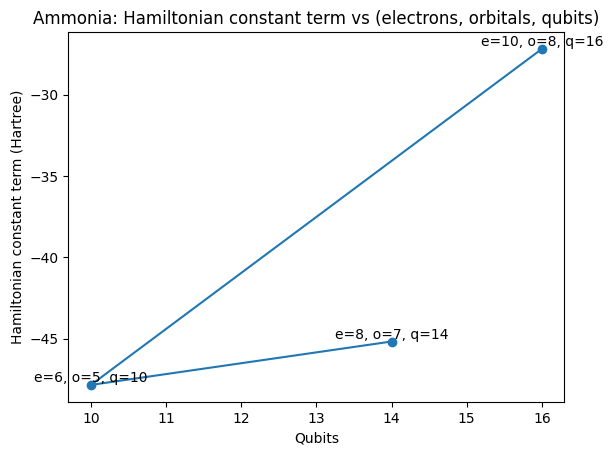

In [9]:
import matplotlib.pyplot as plt

# (label, electrons_used, orbitals_used, qubits, Hamiltonian_constant)
ammonia_variants = [
    ("Full space",            10, 8, 16, -27.19469339870261),  # electrons=10, orbitals=8 -> qubits=16
    ("Active space (ae=6)",    6, 5, 10, -47.84801731775004),  # electrons=6,  orbitals=5 -> qubits=10
    ("Active space (ae=8)",    8, 7, 14, -45.17943308150671),  # electrons=8,  orbitals=7 -> qubits=14
]

qubits = [v[3] for v in ammonia_variants]
Econst = [v[4] for v in ammonia_variants]

plt.figure()
plt.plot(qubits, Econst, marker="o")

for label, e, o, q, E in ammonia_variants:
    plt.text(
        q, E,
        f"e={e}, o={o}, q={q}",
        ha="center", va="bottom"
    )

plt.xlabel("Qubits")
plt.ylabel("Hamiltonian constant term (Hartree)")
plt.title("Ammonia: Hamiltonian constant term vs (electrons, orbitals, qubits)")
plt.show()


### Interpretation of the Constant Term {C_0}

The quantity plotted in this notebook is the coefficient {C_0} multiplying the identity operator in the qubit Hamiltonian representation:

\[
H = C_{0} + H_{explicit}
\]

This term **is not**:
- a ground-state energy,
- a Hartree–Fock energy, or
- a variational estimate of molecular stability.

Instead,  {C_0} collects energy contributions from frozen orbitals and constant terms that are not represented explicitly by Pauli operators.

As the active space is reduced, fewer electronic degrees of freedom are treated explicitly, and more energy is folded into {C_0}. Conversely, expanding the active space shifts energy from the constant term into operator-valued contributions.


No physical principle requires {C_0} to vary monotonically with qubit count. Because {C_0} is not a variational quantity, different active spaces correspond to genuinely different Hamiltonians rather than controlled approximations of a single operator.

As a result, irregular or non-monotonic trends in {C_0} are expected and do not indicate numerical instability.


### Scope and Limitations

This notebook does not attempt to:
- solve the constructed Hamiltonians,
- assess chemical accuracy, or
- compare results to experiment.

Accurate energetic predictions would require exact diagonalization (which becomes infeasible beyond small qubit counts) or quantum algorithms such as VQE or QPE executed on quantum hardware.


### Key Takeaway

This study demonstrates that chemically relevant carbon-capture molecules rapidly lead to qubit Hamiltonians requiring 30–40+ qubits, with construction costs dominated by operator generation rather than solution.

The results highlight that **Hamiltonian engineering itself is already computationally demanding**, reinforcing the need for quantum algorithms and hardware to address realistic electronic-structure problems in carbon capture chemistry.


# Carbonic Acid

In [11]:
from rdkit import Chem
from rdkit.Chem import AllChem
print("RDKit OK")


RDKit OK


In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_molecule(symbols, coords, title):
    xs = [c[0] for c in coords]
    ys = [c[1] for c in coords]
    zs = [c[2] for c in coords]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    ax.scatter(xs, ys, zs, s=120)

    for i, s in enumerate(symbols):
        ax.text(xs[i], ys[i], zs[i], s, fontsize=12)

    ax.set_title(title)
    ax.set_xlabel("X (Å)")
    ax.set_ylabel("Y (Å)")
    ax.set_zlabel("Z (Å)")
    plt.show()



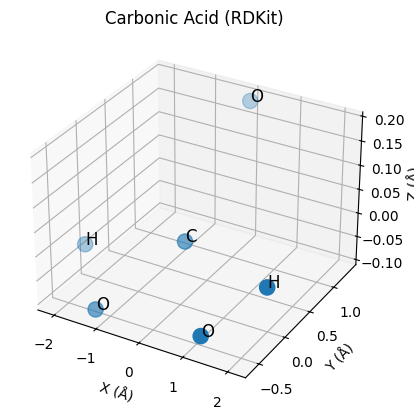

In [13]:
# SMILES for Carbonic Acid (H2CO3)
smiles = "O=C(O)O"

mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)

AllChem.EmbedMolecule(mol)
AllChem.UFFOptimizeMolecule(mol)

conf = mol.GetConformer()

symbols = []
coords = []

for atom in mol.GetAtoms():
    symbols.append(atom.GetSymbol())
    pos = conf.GetAtomPosition(atom.GetIdx())
    coords.append([pos.x, pos.y, pos.z])

coords = np.array(coords)

plot_molecule(symbols, coords, "Carbonic Acid (RDKit)")


In [28]:
from pennylane import qchem

basis_set = "sto-3g"
charge = 0          # carbonic acid is neutral
multiplicity = 1

molecule_carbonic = qchem.Molecule(
    symbols,
    coords,
    charge=charge,
    mult=multiplicity,
    basis_name=basis_set
)

print("Total electrons:", molecule_carbonic.n_electrons)
print("Total spatial orbitals:", molecule_carbonic.n_orbitals)
print("Full-space qubits:", 2 * molecule_carbonic.n_orbitals)



Total electrons: 32
Total spatial orbitals: 22
Full-space qubits: 44


## Plot

Molecule1 created (Carbonic Acid).
Total electrons (full): 32
Total spatial orbitals (full): 22
Full-space qubits: 44

--- Running variant: e=32, o=22 (q=44) ---
Hamiltonian built in 1747.71 s | returned qubits: 44 | type: <class 'pennylane.ops.op_math.sum.Sum'>
Terms expanded + Identity extracted in 9.91 s | E_const = -122.395465807845

--- Running variant: e=24, o=18 (q=36) ---
Hamiltonian built in 1172.08 s | returned qubits: 36 | type: <class 'pennylane.ops.op_math.sum.Sum'>
Terms expanded + Identity extracted in 4.22 s | E_const = -220.419377711251

--- Running variant: e=24, o=16 (q=32) ---
Hamiltonian built in 976.09 s | returned qubits: 32 | type: <class 'pennylane.ops.op_math.sum.Sum'>
Terms expanded + Identity extracted in 1.72 s | E_const = -217.587459230307

Variant summary (Carbonic Acid):
  e=32, o=22 -> q=44 (returned 44) | terms=202359 | E_const=-122.395465807845 Hartree | build=1747.71s | terms+I=9.91s
  e=24, o=18 -> q=36 (returned 36) | terms=98719 | E_const=-220.419

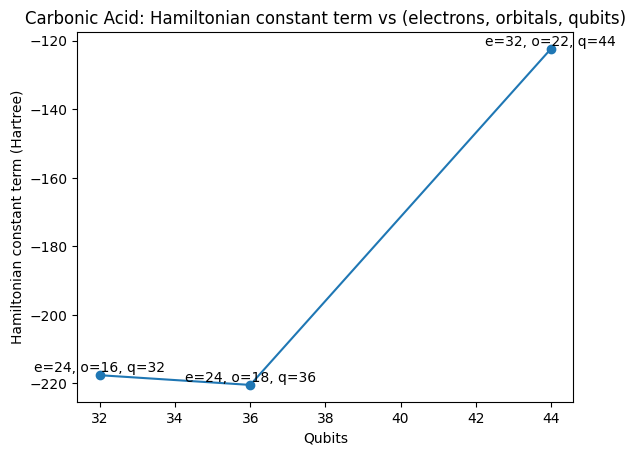

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from pennylane import qchem

# CONFIG: carbonic acid sweep
basis_set = "sto-3g"
charge = 0
multiplicity = 1

# VARIANTS - active space configurations to test
variants = [
    {"active_electrons": 32, "active_orbitals": 22},  # q=44
    {"active_electrons": 24, "active_orbitals": 18},  # q=36
    {"active_electrons": 24, "active_orbitals": 16},  # q=32
]


# Build Molecule 
molecule1 = qchem.Molecule(
    symbols,
    coords,
    charge=charge,
    mult=multiplicity,
    basis_name=basis_set
)

print("Molecule1 created (Carbonic Acid).")
print("Total electrons (full):", molecule1.n_electrons)
print("Total spatial orbitals (full):", molecule1.n_orbitals)
print("Full-space qubits:", 2 * molecule1.n_orbitals)


# Helper:

def identity_constant(op_sum):
    """
    Returns the coefficient of the Identity term if present, else 0.0.
    Works when the Hamiltonian is returned as a Sum-like object.
    """
    E_const = 0.0

    # terms() may return (coeffs, ops) OR list of (coeff, op)
    terms_out = op_sum.terms()
    if isinstance(terms_out, tuple) and len(terms_out) == 2:
        coeffs, ops = terms_out
        pairs = zip(coeffs, ops)
    else:
        pairs = terms_out

    for c, o in pairs:
        if getattr(o, "name", None) == "Identity":
            E_const = float(c)
            break

    return E_const


# Sweep variants (Hamiltonians built)
results = []
for v in variants:
    ae = int(v["active_electrons"])
    ao = int(v["active_orbitals"])
    q = 2 * ao

    print(f"\n--- Running variant: e={ae}, o={ao} (q={q}) ---")

    # 1) Build Hamiltonian
    t0 = time.time()
    H_as, qubits_returned = qchem.molecular_hamiltonian(
        molecule1,
        active_electrons=ae,
        active_orbitals=ao,
    )
    build_s = time.time() - t0
    print(f"Hamiltonian built in {build_s:.2f} s | returned qubits: {qubits_returned} | type: {type(H_as)}")

    # 2) Expand terms + extract Identity constant
    t1 = time.time()
    E_const = identity_constant(H_as)
    terms_s = time.time() - t1
    print(f"Terms expanded + Identity extracted in {terms_s:.2f} s | E_const = {E_const:.12f}")

    # 3) Count terms robustly
    t2 = time.time()
    terms_out = H_as.terms()
    if isinstance(terms_out, tuple) and len(terms_out) == 2:
        n_terms = len(terms_out[0])
    else:
        n_terms = len(terms_out)
    count_s = time.time() - t2

    results.append({
        "e": ae,
        "o": ao,
        "q": q,
        "q_returned": int(qubits_returned),
        "E_const": float(E_const),
        "n_terms": int(n_terms),
        "build_seconds": float(build_s),
        "terms_seconds": float(terms_s),
        "count_seconds": float(count_s)
    })


# Print summary
print("\nVariant summary (Carbonic Acid):")
for r in results:
    print(
        f"  e={r['e']}, o={r['o']} -> q={r['q']} (returned {r['q_returned']}) | "
        f"terms={r['n_terms']} | "
        f"E_const={r['E_const']:.12f} Hartree | "
        f"build={r['build_seconds']:.2f}s | terms+I={r['terms_seconds']:.2f}s"
    )


# Plot
x = [r["q"] for r in results]
y = [r["E_const"] for r in results]

plt.figure()
plt.plot(x, y, marker="o")

for r in results:
    plt.text(
        r["q"], r["E_const"],
        f"e={r['e']}, o={r['o']}, q={r['q']}",
        ha="center", va="bottom"
    )

plt.xlabel("Qubits")
plt.ylabel("Hamiltonian constant term (Hartree)")
plt.title("Carbonic Acid: Hamiltonian constant term vs (electrons, orbitals, qubits)")
plt.show()


For carbonic acid, the larger number of core electrons leads to substantial energy being folded into the constant term {C_0} as the active space is reduced, producing larger shifts and non-monotonic behavior across qubit counts. This reflects active-space–dependent Hamiltonian restructuring rather than numerical instability.


# Bicarbonate

Bicarbonate atoms: ['O', 'C', 'O', 'O', 'H']
coords shape: (5, 3)


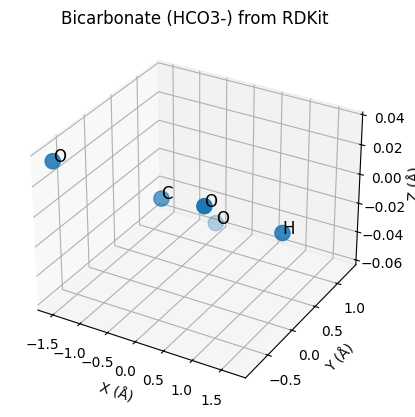

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np


# Bicarbonate ion (HCO3-)

#SMILES: O=C([O-])O
# - carbonyl oxygen: O=
# - one deprotonated oxygen: [O-]
# - one hydroxyl oxygen: O (implicit H)
smiles_bicarb = "O=C([O-])O"

mol_bicarb = Chem.MolFromSmiles(smiles_bicarb)
mol_bicarb = Chem.AddHs(mol_bicarb)

# 3D embedding + force-field optimization
AllChem.EmbedMolecule(mol_bicarb, AllChem.ETKDG())
AllChem.UFFOptimizeMolecule(mol_bicarb)

# Extract symbols + coordinates (in Å)
conf = mol_bicarb.GetConformer()

symbols_bicarb = []
coords_bicarb = []

for atom in mol_bicarb.GetAtoms():
    symbols_bicarb.append(atom.GetSymbol())
    pos = conf.GetAtomPosition(atom.GetIdx())
    coords_bicarb.append([pos.x, pos.y, pos.z])

coords_bicarb = np.array(coords_bicarb, dtype=float)

print("Bicarbonate atoms:", symbols_bicarb)
print("coords shape:", coords_bicarb.shape)

plot_molecule(symbols_bicarb, coords_bicarb, "Bicarbonate (HCO3-) from RDKit")


In [20]:
from pennylane import qchem

basis_set = "sto-3g"
charge = -1        # bicarbonate anion
multiplicity = 1

molecule_bicarb = qchem.Molecule(
    symbols_bicarb,
    coords_bicarb,
    charge=charge,
    mult=multiplicity,
    basis_name=basis_set
)

print("Total electrons:", molecule_bicarb.n_electrons)
print("Total spatial orbitals:", molecule_bicarb.n_orbitals)
print("Full-space qubits:", 2 * molecule_bicarb.n_orbitals)



Total electrons: 32
Total spatial orbitals: 21
Full-space qubits: 42


## Plot

Bicarbonate molecule created.
Total electrons (full): 32
Total spatial orbitals (full): 21
Full-space qubits: 42

--- Running variant: e=32, o=21 (q=42) ---
Hamiltonian built in 1760.10 s | returned qubits: 42 | type: <class 'pennylane.ops.op_math.sum.Sum'>
Terms expanded + Identity extracted in 11.14 s | E_const = -124.797451440042

--- Running variant: e=24, o=17 (q=34) ---
Hamiltonian built in 1074.68 s | returned qubits: 34 | type: <class 'pennylane.ops.op_math.sum.Sum'>
Terms expanded + Identity extracted in 3.42 s | E_const = -222.581191292350

--- Running variant: e=24, o=14 (q=28) ---
Hamiltonian built in 771.78 s | returned qubits: 28 | type: <class 'pennylane.ops.op_math.sum.Sum'>
Terms expanded + Identity extracted in 3.80 s | E_const = -217.016668990139

Variant summary (Bicarbonate):
  e=32, o=21 -> q=42 (returned 42) | terms=235556 | E_const=-124.797451440042 Hartree | build=1760.10s | terms+I=11.14s
  e=24, o=17 -> q=34 (returned 34) | terms=113084 | E_const=-222.5811912

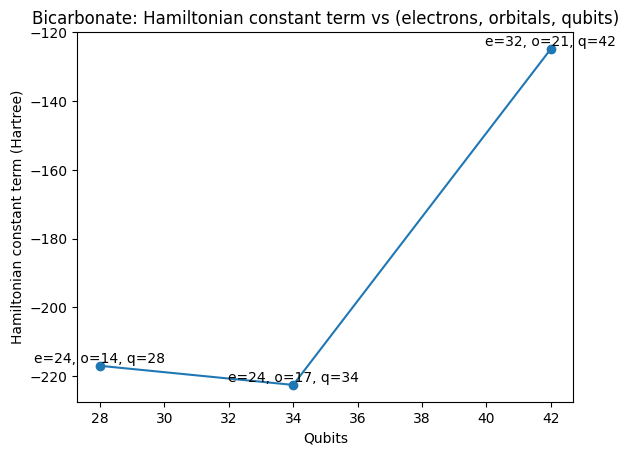

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from pennylane import qchem


# bicarbonate settings
basis_set = "sto-3g"
charge = -1
multiplicity = 1

# VARIANTS - active space configurations to test
variants = [
    {"active_electrons": 32, "active_orbitals": 21},  # q=42
    {"active_electrons": 24, "active_orbitals": 17},  # q=34
    {"active_electrons": 24, "active_orbitals": 14},  # q=28
]


# Build Molecule
molecule_bicarb = qchem.Molecule(
    symbols_bicarb,
    coords_bicarb,
    charge=charge,
    mult=multiplicity,
    basis_name=basis_set
)

print("Bicarbonate molecule created.")
print("Total electrons (full):", molecule_bicarb.n_electrons)
print("Total spatial orbitals (full):", molecule_bicarb.n_orbitals)
print("Full-space qubits:", 2 * molecule_bicarb.n_orbitals)


# Helper: robust Identity-term extraction
def identity_constant(op_sum):
    """
    Returns the coefficient of the Identity term if present, else 0.0.
    Works when the Hamiltonian is returned as a Sum-like object.
    """
    E_const = 0.0

    # terms() may return (coeffs, ops) OR list of (coeff, op)
    terms_out = op_sum.terms()
    if isinstance(terms_out, tuple) and len(terms_out) == 2:
        coeffs, ops = terms_out
        pairs = zip(coeffs, ops)
    else:
        pairs = terms_out

    for c, o in pairs:
        if getattr(o, "name", None) == "Identity":
            E_const = float(c)
            break

    return E_const

# Sweep variants (Hamiltonians built)
results = []
for v in variants:
    ae = int(v["active_electrons"])
    ao = int(v["active_orbitals"])
    q = 2 * ao

    print(f"\n--- Running variant: e={ae}, o={ao} (q={q}) ---")

    # 1) Build Hamiltonian
    t0 = time.time()
    H, qubits_returned = qchem.molecular_hamiltonian(
        molecule_bicarb,
        active_electrons=ae,
        active_orbitals=ao,
    )
    build_s = time.time() - t0
    print(f"Hamiltonian built in {build_s:.2f} s | returned qubits: {qubits_returned} | type: {type(H)}")

    # 2) Expand terms + extract Identity constant
    t1 = time.time()
    E_const = identity_constant(H)
    terms_s = time.time() - t1
    print(f"Terms expanded + Identity extracted in {terms_s:.2f} s | E_const = {E_const:.12f}")

    # 3) Count terms robustly
    t2 = time.time()
    terms_out = H.terms()
    if isinstance(terms_out, tuple) and len(terms_out) == 2:
        n_terms = len(terms_out[0])
    else:
        n_terms = len(terms_out)
    count_s = time.time() - t2

    results.append({
        "e": ae,
        "o": ao,
        "q": q,
        "q_returned": int(qubits_returned),
        "E_const": float(E_const),
        "n_terms": int(n_terms),
        "build_seconds": float(build_s),
        "terms_seconds": float(terms_s),
        "count_seconds": float(count_s)
    })


# Print summary
print("\nVariant summary (Bicarbonate):")
for r in results:
    print(
        f"  e={r['e']}, o={r['o']} -> q={r['q']} (returned {r['q_returned']}) | "
        f"terms={r['n_terms']} | "
        f"E_const={r['E_const']:.12f} Hartree | "
        f"build={r['build_seconds']:.2f}s | terms+I={r['terms_seconds']:.2f}s"
    )


# Plot
x = [r["q"] for r in results]
y = [r["E_const"] for r in results]

plt.figure()
plt.plot(x, y, marker="o")

for r in results:
    plt.text(
        r["q"], r["E_const"],
        f"e={r['e']}, o={r['o']}, q={r['q']}",
        ha="center", va="bottom"
    )

plt.xlabel("Qubits")
plt.ylabel("Hamiltonian constant term (Hartree)")
plt.title("Bicarbonate: Hamiltonian constant term vs (electrons, orbitals, qubits)")
plt.show()


Bicarbonate exhibits similarly irregular trends due to its increased electronic complexity and charge, which amplify the redistribution of energy between explicit operator terms and the constant offset {C_0} under different active-space choices. Each point corresponds to a distinct effective Hamiltonian.


#**References & Study Resources:**

1. **Hamiltonian**
https://en.wikipedia.org/wiki/Hamiltonian_(quantum_mechanics)

2. **Jordan-Wigner Transformation**
https://en.wikipedia.org/wiki/Jordan%E2%80%93Wigner_transformation


3. **Hartree-Fock Method** https://chem.libretexts.org/Courses/Grinnell_College/CHM_364%3A_Physical_Chemistry_2_(Grinnell_College)/08%3A_Multielectron_Atoms/8.07%3A_Hartree-Fock_Calculations_Give_Good_Agreement_with_Experimental_Data

4. **SC Field Approximation**
https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Book%3A_Quantum_States_of_Atoms_and_Molecules_(Zielinksi_et_al)/09%3A_The_Electronic_States_of_the_Multielectron_Atoms/9.07%3A_The_Self-Consistent_Field_Approximation_(Hartree-Fock_Method)

5. **Pennylane demo**
https://pennylane.ai/qml/demos/tutorial_quantum_chemistry

6. **Atomic Orbitals**
https://en.wikipedia.org/wiki/Atomic_orbital

7. **Active Space**
https://en.wikipedia.org/wiki/Complete_active_space

8. **Density functional theory**
https://en.wikipedia.org/wiki/Density_functional_theory

9. https://natural-resources.canada.ca/energy-sources/carbon-management/canada-s-carbon-management-strategy#a1%20

10. https://www.iea.org/commentaries/is-carbon-capture-too-expensive

11. Snæbjörnsdóttir, S.Ó., Sigfússon, B., Marieni, C., Goldberg, D., Gislason, S.R. and Oelkers, E.H., 2020. Carbon dioxide storage through mineral carbonation. Nature Reviews Earth & Environment, 1(2), pp.90-102.

12. https://www.mckinsey.com/industries/oil-and-gas/our-insights/the-world-needs-to-capture-use-and-store-gigatons-of-co2-where-and-how

13. https://www.mckinsey.com/industries/oil-and-gas/our-insights/scaling-the-ccus-industry-to-achieve-net-zero-emissions

